In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime, timedelta

datasets_input = 'data/input'
datasets_output = 'data/output'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
metadata_df = pd.read_pickle(f'{datasets_output}/metadata_df.pkl.gz', compression='gzip')
reviews_df = pd.read_pickle(f'{datasets_output}/reviews_df.pkl.gz', compression='gzip')
user_emb = pd.read_pickle(f'{datasets_output}/user_embeddings.pkl')
img_embds = pd.read_pickle(f'{datasets_output}/image_embeddings.pkl.gz', compression='gzip')

In [7]:
matrix_df = pd.DataFrame(user_emb).T

In [19]:
reviews_df.groupby(by='reviewerID').count().sort_values(by='overall')

,overall,vote,verified,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
reviewerID,,,,,,,,,,
A3L9H8B3C89B9Q,1,1,1,1,1,1,1,1,1,0
A2KWU5SE7DSG5E,1,1,1,1,1,1,1,1,1,0
A9TW6KGZ45A96,1,1,1,1,1,1,1,1,1,0
A3FV9XPL4HZ4YO,1,1,1,1,0,1,1,1,1,0
A2KX0Z2GFA5WEH,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
A2HC9549CZAKNN,45,45,45,45,41,45,45,45,45,0
A2503LT8PZIHAD,55,55,55,55,53,55,55,55,55,0
A2QDOJFFLFGF18,62,62,62,62,57,62,62,62,62,0


In [35]:
from RecommendationSystem import RecommendationSystem as recommendSys

from scipy import spatial
import numpy as np

recommend = recommendSys(matrix_df, metadata_df, reviews_df, img_embds)
# input_user = matrix_df.iloc[11]
input_user = matrix_df.loc['A2RYWPOL4NN2KG']
output_products_winter = recommend.recommend(input_user, 5, contentFilter=True, similarityLimit=0.8, date = datetime(2014, 12, 10))
output_products_summer = recommend.recommend(input_user, 5, contentFilter=True, similarityLimit=0.8, date = datetime(2014, 7, 10))
output_products_spring = recommend.recommend(input_user, 5, contentFilter=True, similarityLimit=0.8, date = datetime(2014, 4, 10))
output_products_autumn = recommend.recommend(input_user, 5, contentFilter=True, similarityLimit=0.8, date = datetime(2014, 9, 10))

User reviewed 5 products:


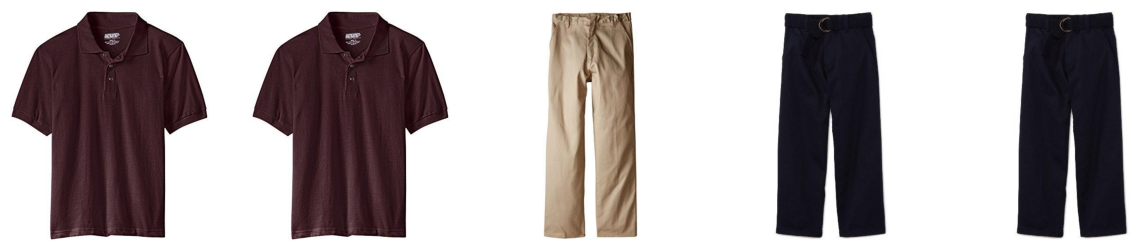

System recommend for winter 5 products:


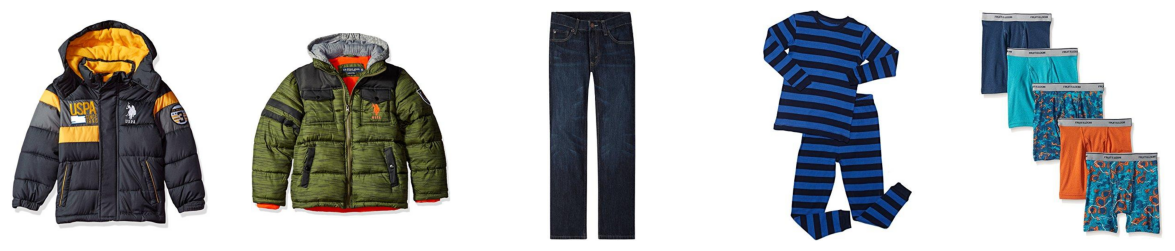

System recommend for summer 5 products:


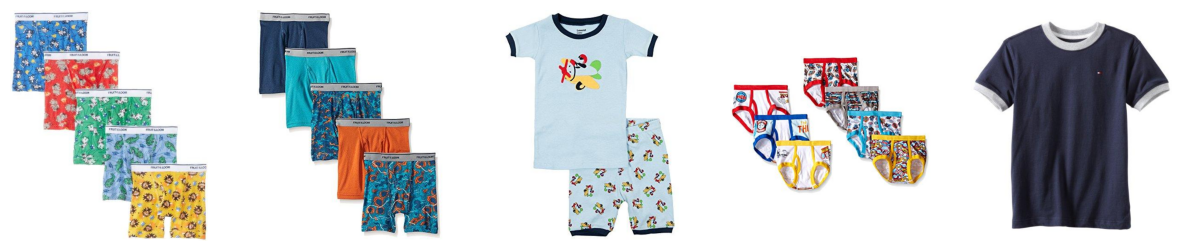

System recommend for autumn 5 products:


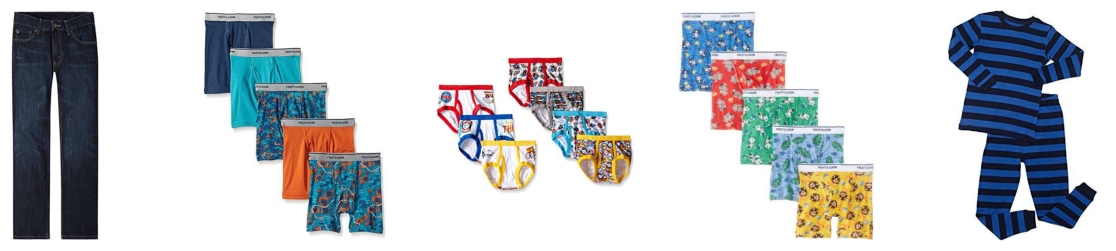

System recommend for spring 5 products:


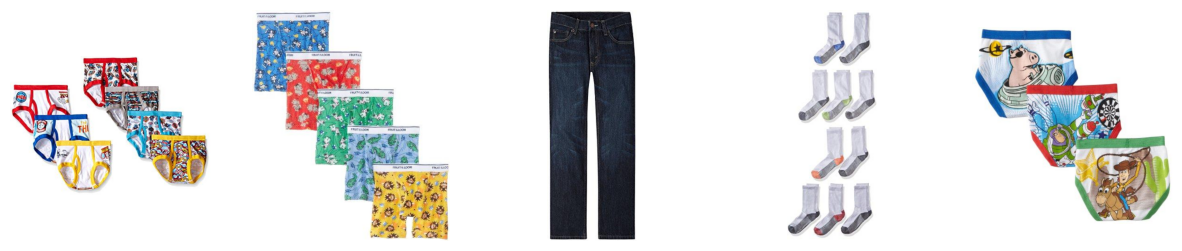

In [36]:
input_datasets = './data'
def get_img(item_id):
    path = f'{input_datasets}/images/{item_id}/{item_id}_0.jpg'
    return Image.open(path)

def show_imgs(products, titles=None, columns=5, rows=1):
    imgs = [get_img(product) for product in products]
    fig = plt.figure(figsize=(columns*3, rows*3))
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        
        plt.imshow(np.asarray(imgs[i-1]))
        plt.axis('off')
        if titles:
            plt.title(titles[i-1])
    plt.show()

user_products_id = recommend.getUserObjects(input_user)[:5]
print('User reviewed', len(user_products_id), 'products:')
show_imgs(user_products_id, None, len(user_products_id))
print('System recommend for winter', len(output_products_winter), 'products:')
show_imgs(output_products_winter, None, len(output_products_winter))

print('System recommend for summer', len(output_products_summer), 'products:')
show_imgs(output_products_summer, None, len(output_products_summer))


print('System recommend for autumn', len(output_products_autumn), 'products:')
show_imgs(output_products_autumn, None, len(output_products_autumn))

print('System recommend for spring', len(output_products_spring), 'products:')
show_imgs(output_products_spring, None, len(output_products_spring))

In [ ]:
raise Exception()

In [6]:
# from util import evaluate

# evaluate(recommend, matrix_df.head(500), reviews_df, 5, date = datetime(2014, 8, 10))

{'intersection': 0.09090909090909091,
 'reciprocal': 0.09090909090909091,
 'precision': 0.09090909090909091,
 'dcg': 0.09090909090909091,
 'tested_users': 11}

# 2013

In [31]:
timestanp1 = datetime(2013, 1, 1).timestamp()
timestanp2 = datetime(2013, 12, 31).timestamp()

reviews_df_season = reviews_df[reviews_df['unixReviewTime'] >= timestanp1]
reviews_df_season = reviews_df_season[reviews_df_season['unixReviewTime'] <= timestanp2]

matrix_df_season = matrix_df[matrix_df.index.isin(reviews_df_season['reviewerID'].unique())]

In [32]:
from util import evaluate_k_fold, combine_results

# evaluate to be fixed, whoops
results_kf_off = evaluate_k_fold(recommendSys, matrix_df_season, metadata_df, reviews_df_season, img_embds, folds=3, n=5, 
                                 metric=spatial.distance.cosine, contentFilter=False, similarityLimit=0.8)
combine_results(results_kf_off)

100%|██████████| 1902/1902 [1:07:29<00:00,  2.13s/it]


{'intersection': 0.07722394375856202,
 'reciprocal': 0.03971538749578903,
 'precision': 0.04588852042240016,
 'dcg': 0.05501988224634296,
 'tested_users': 1902.3333333333333}

In [33]:
from util import evaluate_k_fold, combine_results

# evaluate to be fixed, whoops
results_kf_off = evaluate_k_fold(recommendSys, matrix_df, metadata_df, reviews_df, img_embds, folds=3, n=5, 
                                 metric=spatial.distance.cosine, contentFilter=False, similarityLimit=0.8, date = datetime(2013, 6, 10))
combine_results(results_kf_off)

100%|██████████| 34785/34785 [08:20<00:00, 69.57it/s] 


{'intersection': 0.10039312735809192,
 'reciprocal': 0.08206798473308985,
 'precision': 0.0866370035605206,
 'dcg': 0.09200825169165655,
 'tested_users': 459.6666666666667}

In [34]:
from util import evaluate_k_fold, combine_results

# evaluate to be fixed, whoops
results_kf_off = evaluate_k_fold(recommendSys, matrix_df, metadata_df, reviews_df, img_embds, folds=3, n=5, 
                                 metric=spatial.distance.cosine, contentFilter=False, similarityLimit=0.8, date = datetime(2013, 1, 10))
combine_results(results_kf_off)

100%|██████████| 34785/34785 [07:20<00:00, 78.89it/s] 


{'intersection': 0.057335631677106765,
 'reciprocal': 0.029629659193037228,
 'precision': 0.03483555326368757,
 'dcg': 0.04244219127920961,
 'tested_users': 403.6666666666667}

# 2014

In [27]:
from util import evaluate_k_fold, combine_results

# evaluate to be fixed, whoops
results_kf_off = evaluate_k_fold(recommendSys, matrix_df, metadata_df, reviews_df, img_embds, folds=3, n=5, 
                                 metric=spatial.distance.cosine, contentFilter=False, similarityLimit=0.8, date = datetime(2014, 6, 10))
combine_results(results_kf_off)

100%|██████████| 34785/34785 [1:13:53<00:00,  7.85it/s]


{'intersection': 0.05671471122977517,
 'reciprocal': 0.04916146930202426,
 'precision': 0.0492002876509619,
 'dcg': 0.053061005581311584,
 'tested_users': 1132.6666666666667}

In [28]:
from util import evaluate_k_fold, combine_results

# evaluate to be fixed, whoops
results_kf_off = evaluate_k_fold(recommendSys, matrix_df, metadata_df, reviews_df, img_embds, folds=3, n=5, 
                                 metric=spatial.distance.cosine, contentFilter=False, similarityLimit=0.8, date = datetime(2014, 1, 10))
combine_results(results_kf_off)

100%|██████████| 34785/34785 [37:37<00:00, 15.41it/s]  


{'intersection': 0.03448255968529209,
 'reciprocal': 0.020278314911312264,
 'precision': 0.022060197494145933,
 'dcg': 0.028316523589019316,
 'tested_users': 812.6666666666666}

# 2013

| Metric          | All Year                  | Summer                   | Winter                  |
|-----------------|---------------------------|--------------------------|-------------------------|
| Intersection    | 0.0772                    | 0.1004                   | 0.0573                  |
| Reciprocal       | 0.0397                    | 0.0821                   | 0.0296                  |
| Precision       | 0.0459                    | 0.0866                   | 0.0348                  |
| DCG             | 0.0550                    | 0.0920                   | 0.0424                  |
| Tested Users    | 1902.33                   | 459.67                   | 403.67                  |


# 2013

| Metric          | Summer                   | Winter                   |
|-----------------|--------------------------|--------------------------|
| Intersection    | 0.0567                   | 0.0345                   |
| Reciprocal       | 0.0492                   | 0.0203                   |
| Precision       | 0.0492                   | 0.0221                   |
| DCG             | 0.0531                   | 0.0283                   |
| Tested Users    | 1132.67                  | 812.67                   |
